### Hotel Booking Demand EDA/ Data Visualisation

In [1]:
# Suppressing Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing neccesary libraries.

import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns', 500)

### 1.Reading and Inspection

In [3]:
hotel= pd.read_csv("C:\\Users\\ivank\\Downloads\\hotel_bookings.csv")

In [4]:
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
print(hotel.shape)

(119390, 32)


In [6]:
# Let's look at the statistical aspects of the dataframes

hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [7]:
# Checking datatypes

hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

The dataset have 32 variables (Continuous and Categorical) with one identified dependent variable (categorical), which is 'is_cancelled.

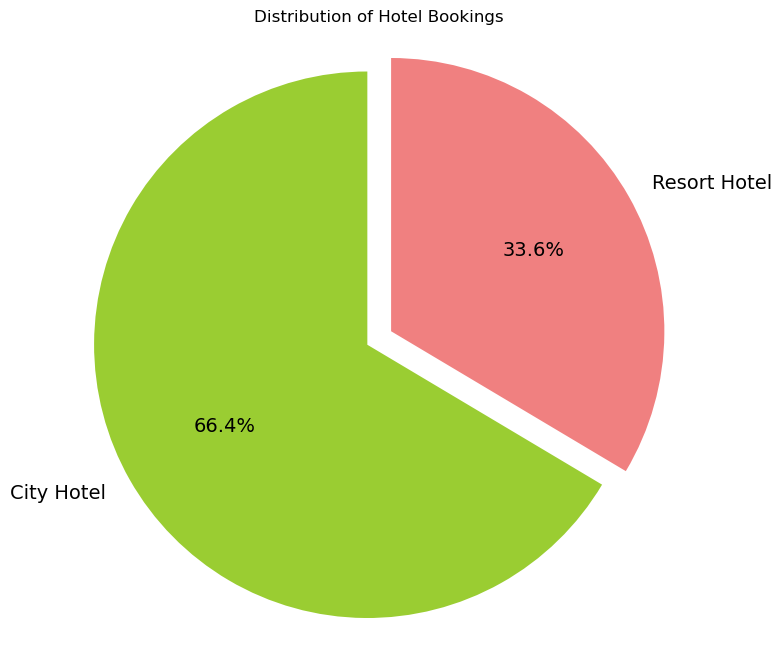

In [8]:
# Enlarging the pie chart
plt.rcParams['figure.figsize'] = 8, 8

# Indexing labels. tolist() will convert the index to list for easy manipulation
labels = hotel['hotel'].value_counts().index.tolist()

# Convert value counts to list
sizes = hotel['hotel'].value_counts().tolist()

# As the name suggests, explode will determine how much each section is separated from each other 
explode = (0, 0.1)

# Determine the color of the pie chart
colors = ['yellowgreen', 'lightcoral']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14})
plt.title('Distribution of Hotel Bookings')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


- We can see that the percent of City hotel is more compared to Resort hotel.
- Resort Hotel tend to be on the expensive side and most people will just stick with city hotel.

### 2. Cleaning the Data

In [9]:
# Checking the missing values in the columns

hotel.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [10]:
# Column-wise null percentage

print(round(100*(hotel.isnull().sum()/len(hotel.index)),2))

hotel                              0.00
is_canceled                        0.00
lead_time                          0.00
arrival_date_year                  0.00
arrival_date_month                 0.00
arrival_date_week_number           0.00
arrival_date_day_of_month          0.00
stays_in_weekend_nights            0.00
stays_in_week_nights               0.00
adults                             0.00
children                           0.00
babies                             0.00
meal                               0.00
country                            0.41
market_segment                     0.00
distribution_channel               0.00
is_repeated_guest                  0.00
previous_cancellations             0.00
previous_bookings_not_canceled     0.00
reserved_room_type                 0.00
assigned_room_type                 0.00
booking_changes                    0.00
deposit_type                       0.00
agent                             13.69
company                           94.31


### The dataset contains Missing values.
Drop unecessary columns and columns with high missing values:


In [11]:
hotel = hotel.drop(['agent','company'],axis=1)

Country has 488 rows with the NaN values. 488 rows out of 119390 is negligible hence we will just remove.

In [12]:
hotel = hotel.dropna(axis = 0)

In [13]:
hotel.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

No more missing values in the data

Lets Rename the columns for better readability

In [14]:
hotel.columns = ['Hotel', 'Canceled', 'LeadTime', 'ArrivingYear', 'ArrivingMonth', 'ArrivingWeek','ArrivingDate', 'WeekendStay',
              'WeekStay', 'Adults', 'Children', 'Babies', 'Meal','Country', 'Segment', 'DistChannel','RepeatGuest', 'PrevCancel',
              'PrevBook', 'BookRoomType','AssignRoomType', 'ChangeBooking', 'DepositType', 'WaitingDays', 
              'CustomerType', 'ADR','ParkSpace', 'SpecialRequest','Reservation', 'ReservationDate']

#### Identify Continuous and Categorical Variables

In [15]:
def var(hotel):
    unique_list = pd.DataFrame([[i,len(hotel[i].unique())] for i in hotel.columns])
    unique_list.columns = ['name','uniques']

    total_var = set(hotel.columns)
    cat_var = set(unique_list.name[(unique_list.uniques<=12)      | 
                                   (unique_list.name=='Country')  | 
                                   (unique_list.name=='Agent')                                     
                                  ])
    con_var = total_var - cat_var
    
    return cat_var, con_var 


cat_var, con_var = var(hotel)

print("Continuous Variables (",len(con_var),")\n",con_var,'\n\n'
      "Categorical Variables(",len(cat_var),")\n",cat_var)

Continuous Variables ( 12 )
 {'Adults', 'ReservationDate', 'LeadTime', 'PrevBook', 'ArrivingWeek', 'ArrivingDate', 'PrevCancel', 'ADR', 'WeekendStay', 'WeekStay', 'ChangeBooking', 'WaitingDays'} 

Categorical Variables( 18 )
 {'ParkSpace', 'Children', 'ArrivingYear', 'Hotel', 'Canceled', 'BookRoomType', 'SpecialRequest', 'Reservation', 'ArrivingMonth', 'Meal', 'Country', 'CustomerType', 'RepeatGuest', 'Babies', 'AssignRoomType', 'DepositType', 'DistChannel', 'Segment'}


Checking the Outliers

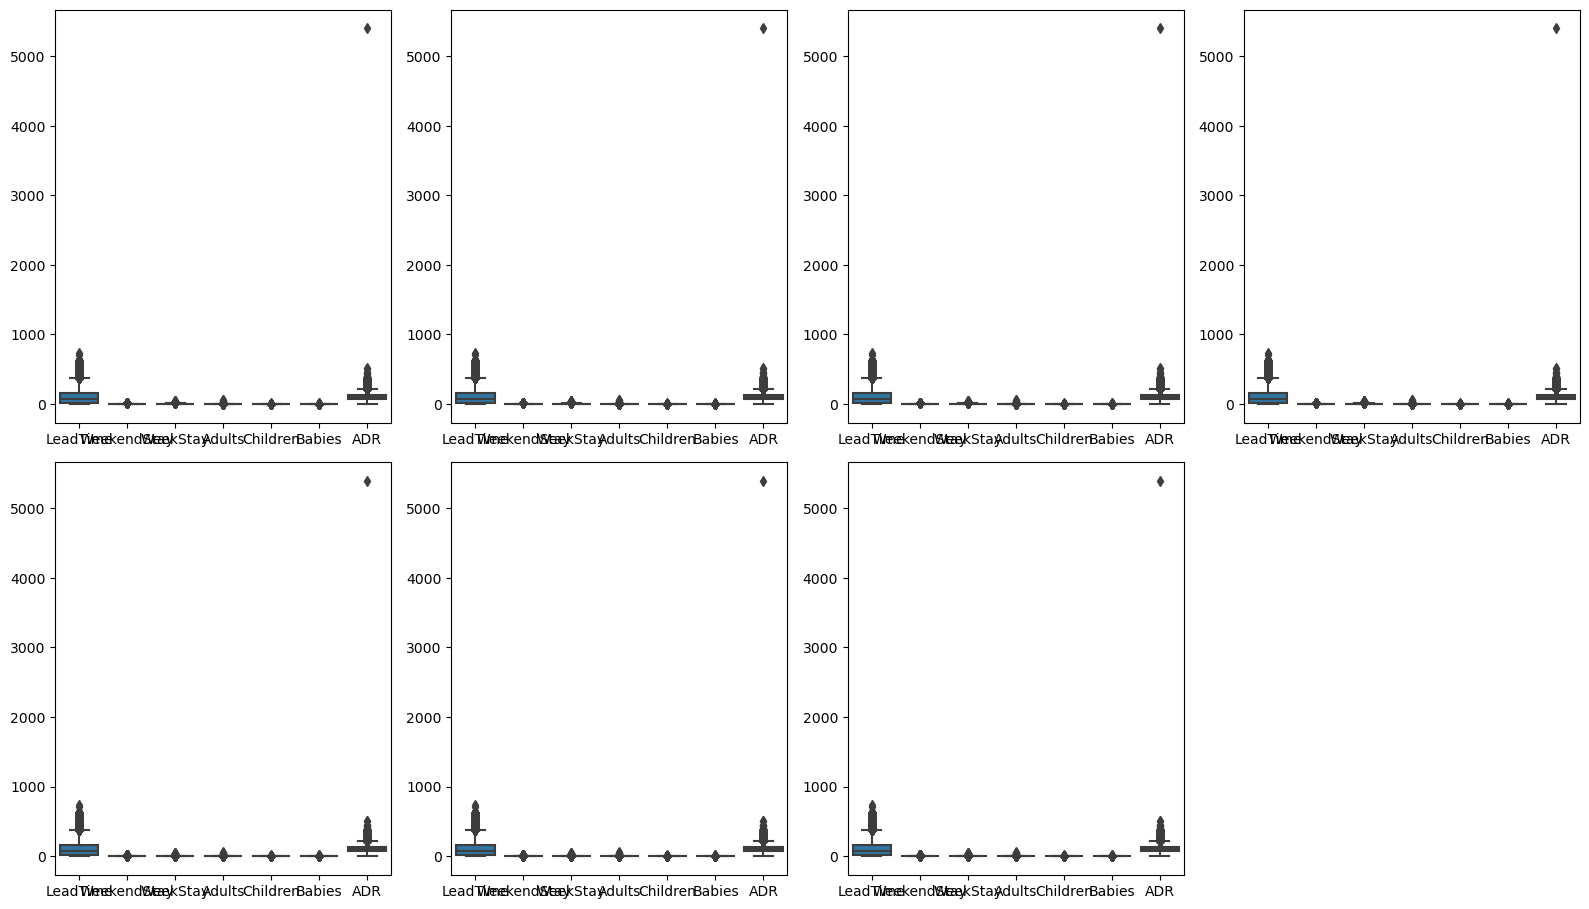

In [16]:
# Creating a boxplot for Outlier detection

features = ['LeadTime', 'WeekendStay', 'WeekStay', 'Adults','Children', 'Babies','ADR']
n = 1
plt.figure(figsize=(16,18))
for feature in features:
    plt.subplot(4,4,n)
    sns.boxplot(hotel[features])
    n+=1
    plt.tight_layout()

The dataset contains Outliers.

In [17]:
# Checking outliers in continuous variables

hotel[list(con_var)].describe()

,Adults,LeadTime,PrevBook,ArrivingWeek,ArrivingDate,PrevCancel,ADR,WeekendStay,WeekStay,ChangeBooking,WaitingDays
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,1.858391,104.311435,0.131634,27.166555,15.800880,0.087142,102.003243,0.928897,2.502145,0.221181,2.330754
std,0.578576,106.903309,1.484672,13.589971,8.780324,0.845869,50.485862,0.996216,1.900168,0.652785,17.630452
min,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-6.380000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,18.000000,0.000000,16.000000,8.000000,0.000000,70.000000,0.000000,1.000000,0.000000,0.000000
50%,2.000000,69.000000,0.000000,28.000000,16.000000,0.000000,95.000000,1.000000,2.000000,0.000000,0.000000
75%,2.000000,161.000000,0.000000,38.000000,23.000000,0.000000,126.000000,2.000000,3.000000,0.000000,0.000000
max,55.000000,737.000000,72.000000,53.000000,31.000000,26.000000,5400.000000,16.000000,41.000000,21.000000,391.000000


In [18]:
# Checking outliers in categorical variables

hotel[list(cat_var)].describe()

,ParkSpace,Children,ArrivingYear,Canceled,SpecialRequest,RepeatGuest,Babies
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.061885,0.104207,2016.157656,0.371352,0.571683,0.032011,0.007948
std,0.244172,0.399172,0.707459,0.483168,0.792678,0.176029,0.097380
min,0.000000,0.000000,2015.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2016.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,2016.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000
max,8.000000,10.000000,2017.000000,1.000000,5.000000,1.000000,10.000000


List of Continuous Variables with Outliers identified through Summary Statistics are:
- LeadTime
- WaitingDays
- WeekendStay
- Adults
- PrevBook
- PrevCancel
- WeekStay

List of Continuous Variables which should be Categorical are:
- PrevBook
- PrevCancel

#### Imputing the Outliers (for Continuous Variable)

In [19]:
hotel.loc[hotel.LeadTime      > 500,'LeadTime'     ]=500
hotel.loc[hotel.WaitingDays   >   0,'WaitingDays'  ]=  1
hotel.loc[hotel.WeekendStay   >=  5,'WeekendStay'  ]=  5
hotel.loc[hotel.Adults        >   4,'Adults'       ]=  4
hotel.loc[hotel.PrevBook      >   0,'PrevBook'     ]=  1
hotel.loc[hotel.PrevCancel    >   0,'PrevCancel'   ]=  1
hotel.loc[hotel.WeekStay      >  10,'WeekStay'     ]= 10
hotel.loc[hotel.ChangeBooking >   5,'ChangeBooking']=  5

cat_var = set(list(cat_var) + ['PrevBook','PrevCancel'])
con_var = set(hotel.columns) - cat_var

hotel[list(con_var)].describe()

,Adults,LeadTime,ArrivingWeek,ArrivingDate,ADR,WeekendStay,WeekStay,ChangeBooking,WaitingDays
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,1.855607,104.054543,27.166555,15.800880,102.003243,0.924187,2.481581,0.217237,0.031102
std,0.488194,105.834923,13.589971,8.780324,50.485862,0.967762,1.760766,0.602693,0.173595
min,0.000000,0.000000,1.000000,1.000000,-6.380000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,18.000000,16.000000,8.000000,70.000000,0.000000,1.000000,0.000000,0.000000
50%,2.000000,69.000000,28.000000,16.000000,95.000000,1.000000,2.000000,0.000000,0.000000
75%,2.000000,161.000000,38.000000,23.000000,126.000000,2.000000,3.000000,0.000000,0.000000
max,4.000000,500.000000,53.000000,31.000000,5400.000000,5.000000,10.000000,5.000000,1.000000


In [20]:
# Outliers in categorical variables

hotel[list(cat_var)].describe()

,PrevBook,PrevCancel,RepeatGuest,Children,ParkSpace,ArrivingYear,Canceled,SpecialRequest,Babies
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.028571,0.054223,0.032011,0.104207,0.061885,2016.157656,0.371352,0.571683,0.007948
std,0.166597,0.226458,0.176029,0.399172,0.244172,0.707459,0.483168,0.792678,0.097380
min,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,10.000000,8.000000,2017.000000,1.000000,5.000000,10.000000


In [21]:
hotel.loc[hotel.Babies    > 8,'Babies']    = 0
hotel.loc[hotel.ParkSpace > 5,'ParkSpace'] = 0
hotel.loc[hotel.Children  > 8,'Children']  = 0

hotel[list(cat_var)].describe()

,PrevBook,PrevCancel,RepeatGuest,Children,ParkSpace,ArrivingYear,Canceled,SpecialRequest,Babies
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.028571,0.054223,0.032011,0.104123,0.061750,2016.157656,0.371352,0.571683,0.007788
std,0.166597,0.226458,0.176029,0.398139,0.241992,0.707459,0.483168,0.792678,0.089236
min,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,3.000000,3.000000,2017.000000,1.000000,5.000000,2.000000


Now we have treated the outliers

### 3. Data Preparation

In [22]:
#Lets combine children and babies together as kids
hotel['Kids'] = hotel.Children + hotel.Babies

#Combine total mumbers by adding kids and adults
hotel['total_members'] = hotel.Kids + hotel.Adults

In [23]:
# Convert the datatypes to string

hotel['ArrivingYear'] = hotel['ArrivingYear'].astype('str')
hotel['ArrivingMonth'] = hotel['ArrivingMonth'].astype('str')
hotel['ArrivingDate'] = hotel['ArrivingDate'].astype('str')

hotel['Canceled'] = hotel['Canceled'].astype('str')
hotel['RepeatGuest'] = hotel['RepeatGuest'].astype('str')

In [24]:
# Lets convert arrival date to datetime

hotel['Arrival Date'] = hotel['ArrivingDate'] + '-' + hotel['ArrivingMonth'] + '-' + hotel['ArrivingYear']
hotel['Arrival Date'] = pd.to_datetime(hotel['Arrival Date'], errors='coerce')

In [25]:
# Filter confirmed bookings where 'Canceled' is '0'

confirmed_bookings = hotel[hotel.Canceled=='0']

In [26]:
confirmed_bookings

,Hotel,Canceled,LeadTime,ArrivingYear,ArrivingMonth,ArrivingWeek,ArrivingDate,WeekendStay,WeekStay,Adults,Children,Babies,Meal,Country,Segment,DistChannel,RepeatGuest,PrevCancel,PrevBook,BookRoomType,AssignRoomType,ChangeBooking,DepositType,WaitingDays,CustomerType,ADR,ParkSpace,SpecialRequest,Reservation,ReservationDate,Kids,total_members,Arrival Date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01,0.0,2.0,2015-07-01
1,Resort Hotel,0,500,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01,0.0,2.0,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,0.0,1.0,2015-07-01
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,0.0,1.0,2015-07-01
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03,0.0,2.0,2015-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06,0.0,2.0,2017-08-30
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07,0.0,3.0,2017-08-31
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07,0.0,2.0,2017-08-31
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07,0.0,2.0,2017-08-31


In [27]:
import datetime as dt
confirmed_bookings['ArrivingMonth'] = hotel['Arrival Date'].dt.month
final=confirmed_bookings['ArrivingMonth'].value_counts().sort_index()
final

ArrivingMonth
1     4068
2     5317
3     6591
4     6533
5     7102
6     6393
7     7892
8     8618
9     6367
10    6867
11    4632
12    4365
Name: count, dtype: int64

### 3. EDA

### Cancelations

In [28]:
print('Total Bookings canceled')
print('-'*50)
print(hotel.Canceled.value_counts())
print('-'*50)
print('*'*75)
print('Cancelation percentage in both hotels ')
print('-'*50)
print(hotel.Canceled.value_counts(normalize=True))

Total Bookings canceled
--------------------------------------------------
Canceled
0    74745
1    44153
Name: count, dtype: int64
--------------------------------------------------
***************************************************************************
Cancelation percentage in both hotels 
--------------------------------------------------
Canceled
0    0.628648
1    0.371352
Name: proportion, dtype: float64


44153 bookings were canceled which is around 37%

### Country

In [29]:
hotel.Country.value_counts(normalize=True)

Country
PRT    0.408636
GBR    0.102012
FRA    0.087596
ESP    0.072062
DEU    0.061288
         ...   
DJI    0.000008
BWA    0.000008
HND    0.000008
VGB    0.000008
NAM    0.000008
Name: proportion, Length: 177, dtype: float64

Around 40% of all bookings were booked from Portugal followed by Great Britain(10%) & France(8%).

### Month

In [30]:
hotel.ArrivingMonth.value_counts(normalize=True)

ArrivingMonth
August       0.116503
July         0.106209
May          0.099068
October      0.093315
April        0.092895
June         0.091902
September    0.088033
March        0.081911
February     0.067385
November     0.056788
December     0.056586
January      0.049404
Name: proportion, dtype: float64

August is the most occupied (busiest) month with 11.62% bookings and January is the most unoccupied month with 4.96% bookings.

### Market Segment

In [31]:
hotel.Segment.value_counts(normalize=True)

Segment
Online TA        0.474373
Offline TA/TO    0.203199
Groups           0.166580
Direct           0.104695
Corporate        0.042986
Complementary    0.006173
Aviation         0.001993
Name: proportion, dtype: float64

Around 47% of bookings are made via Online Travel Agents, almost 20% of bookings are made via Offline Travel Agents and less than 20% are Direct bookings without any other agents.

### Year

In [32]:
hotel.ArrivingYear.value_counts(normalize=True)

ArrivingYear
2016    0.474651
2017    0.341503
2015    0.183847
Name: proportion, dtype: float64

47% bookings were done in 2016, 34% in 2017 and 18 percent in 2015.. We can see increasing tendency in bookings year wise

### Meal

In [33]:
hotel.Meal.value_counts(normalize=True)

Meal
BB           0.772620
HB           0.121398
SC           0.089472
Undefined    0.009798
FB           0.006712
Name: proportion, dtype: float64

Out of the meals, BB (Bed & Breakfast) is the most ordered meal which is around 77.2%, followed by HB(Half Board), SC(no meal package), Undefined and FB (Full Board).

### Customer Type

In [34]:
hotel.CustomerType.value_counts(normalize=True)

CustomerType
Transient          0.750004
Transient-Party    0.210920
Contract           0.034281
Group              0.004794
Name: proportion, dtype: float64

Transient type of customers are the more around 75%

In [35]:
hotel.Reservation.value_counts(normalize=True)

Reservation
Check-Out    0.628648
Canceled     0.361234
No-Show      0.010118
Name: proportion, dtype: float64

We can see 63% visitors checked out and 36% bookings were canceled

### 4. Data Visualization

Text(0.5, 1.0, 'Arriving year, Leadtime and Cancelations')

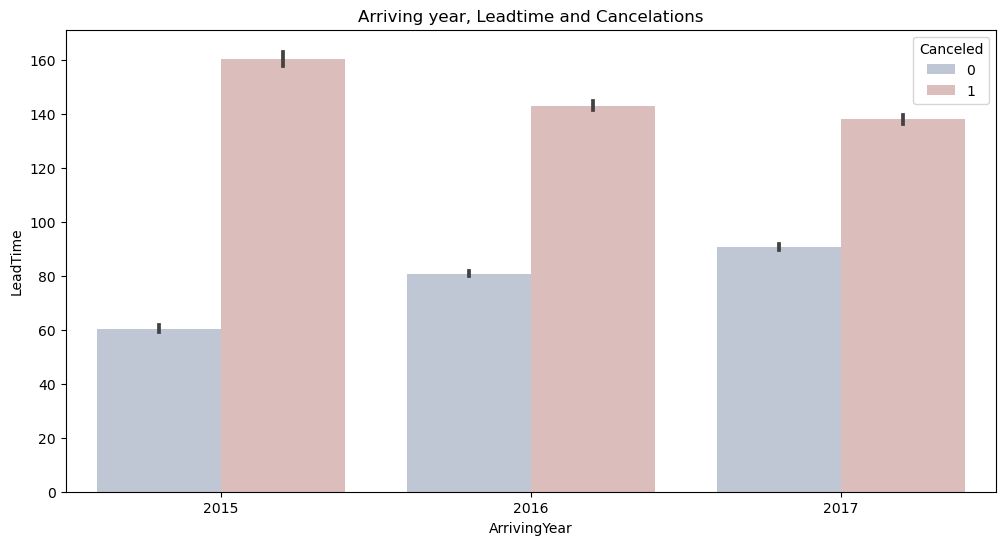

In [36]:
plt.figure(figsize=(12,6))
sns.barplot(x='ArrivingYear', y='LeadTime',hue='Canceled', data= hotel, palette='vlag')
plt.title('Arriving year, Leadtime and Cancelations')

For all the 3 years, bookings with a lead time less than 100 days have fewer chances of getting canceled, and lead time more than 100 days have more chances of getting canceled.

<Axes: >

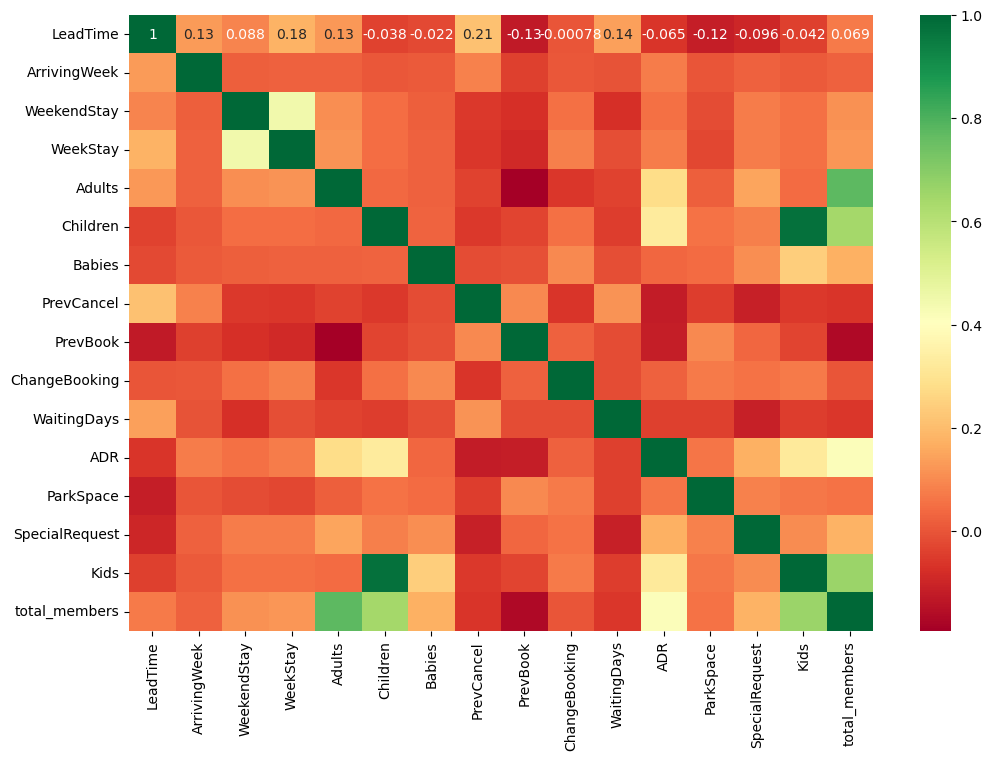

In [37]:
# Selecting only numeric columns
numeric_columns = hotel.select_dtypes(include=np.number)

# Plotting the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='RdYlGn')

# Error 1

- After completing scroll down for error 2


- Here is the code with an error

### Canceled (topic name)

import seaborn as sns
import matplotlib.pyplot as plt

#Convert 'Canceled' column to numerical values
hotel['Canceled'] = hotel['Canceled'].map({'yes': 1, 'no': 0})

#Plot count of canceled and not canceled bookings
sns.countplot(x='Canceled', data=hotel)
plt.title('Count of canceled and not canceled bookings')
plt.xlabel('Canceled')
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(12,6))
sns.barplot(x='ArrivingYear', y='LeadTime',hue='Canceled', data= hotel, palette='vlag')
plt.title('Arriving year, Leadtime and Cancelations')

Canceled = 1

Not canceled = 0

Majority of bookings were not canceled, still some half of the bookings were canceled

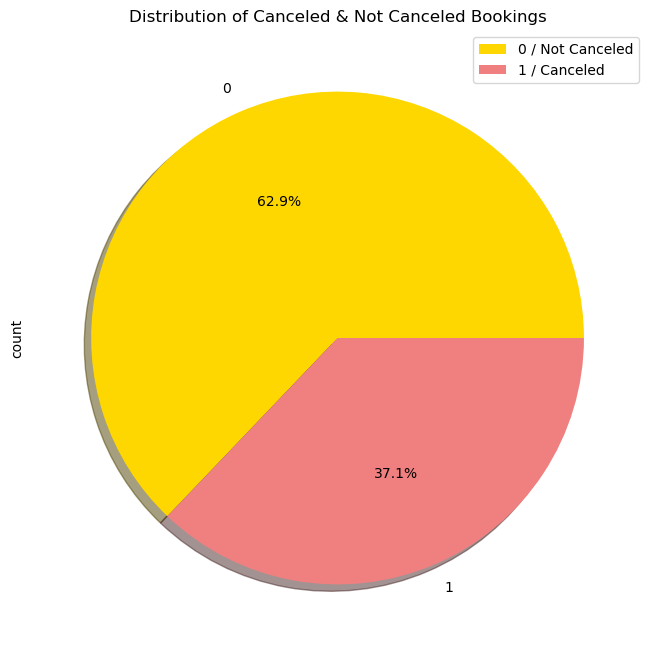

In [38]:
import matplotlib.pyplot as plt

# Define colors for the pie chart
colors = ['gold', 'lightcoral']

# Plot pie chart
hotel['Canceled'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, colors=colors)

# Add legend
plt.legend(labels=['0 / Not Canceled', '1 / Canceled'], loc='best')

# Add title
plt.title('Distribution of Canceled & Not Canceled Bookings')

# Show plot
plt.show()


According to the pie chart, 63% of bookings were not canceled and 37% of the bookings were canceled at the Hotel.

# Error 2

- Error 2

plt.figure(figsize=(12, 6))

#Convert numerical values in 'Canceled' column to string labels
hotel['Canceled'] = hotel['Canceled'].map({1: 'Canceled', 0: 'Not Canceled'})

#Plot count of canceled and not canceled bookings for each hotel
sns.countplot(x='Hotel', hue='Canceled', data=hotel, palette='Pastel1')

plt.title("Cancelation rates in City hotel and Resort hotel", fontweight="bold", size=20)
plt.show()

- Most bookings were in city hotel

- Cancelations in Resort hotel is less compared to city hotel

### Arrivals in month and year

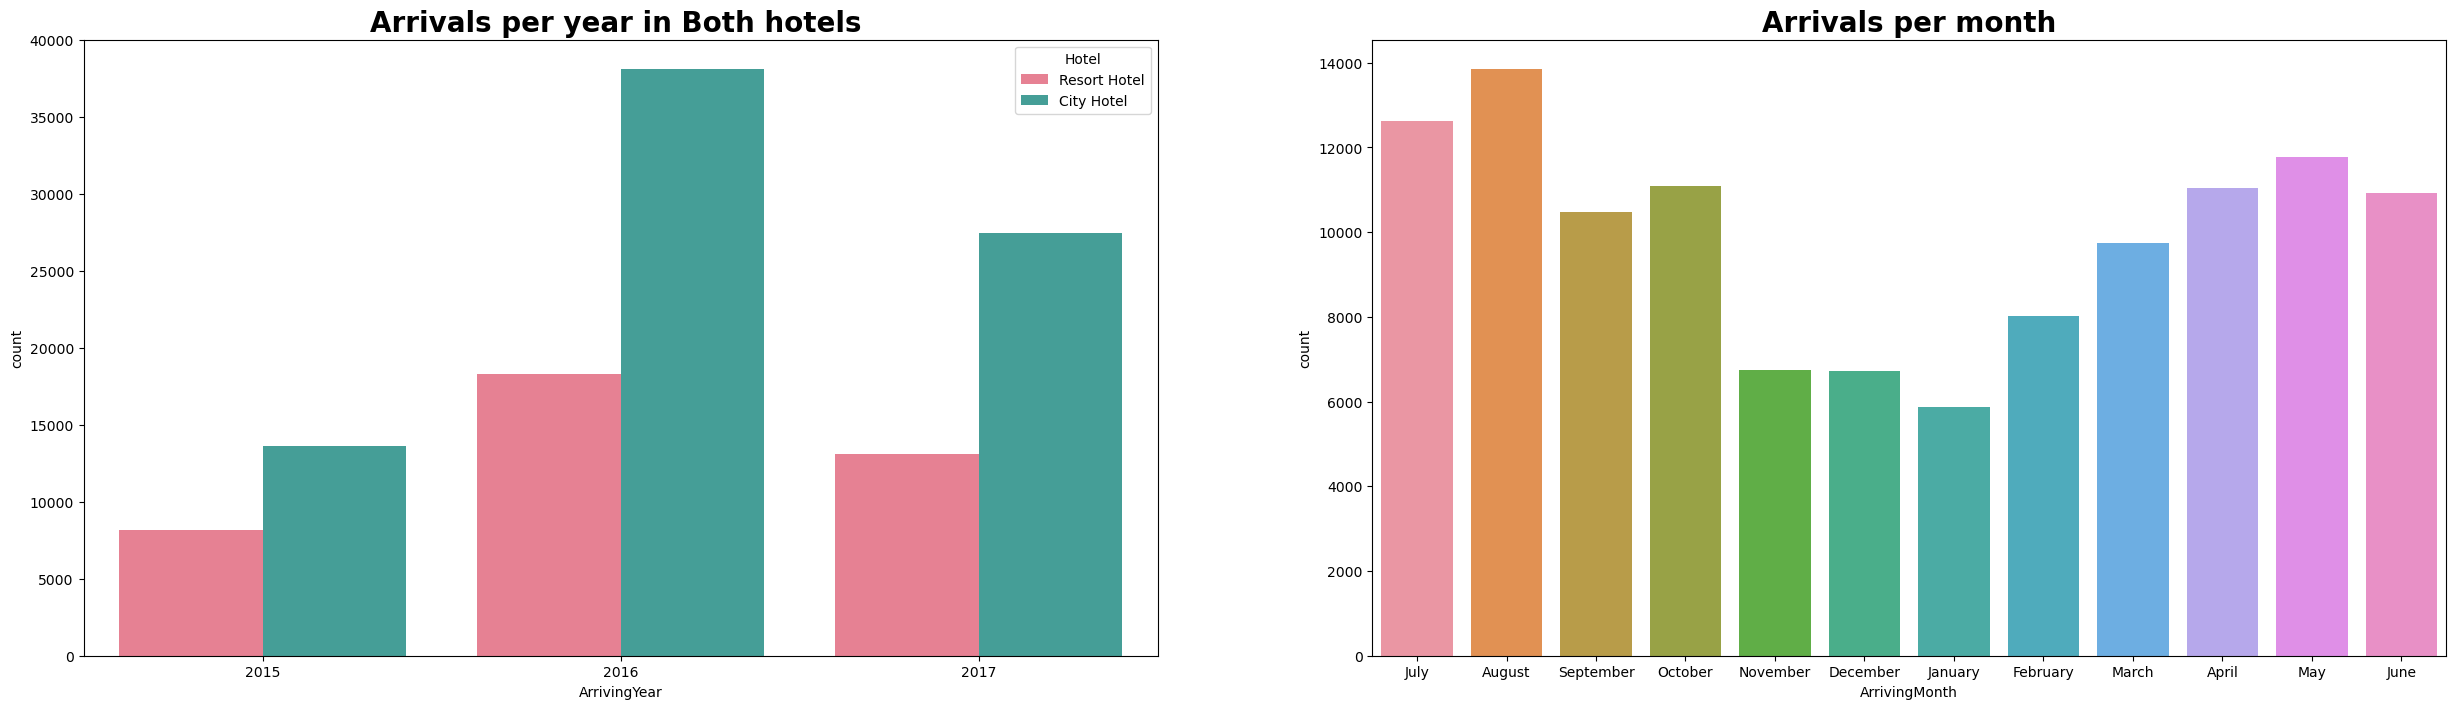

In [39]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='ArrivingYear',hue='Hotel', data=hotel,palette='husl')
plt.title("Arrivals per year in Both hotels ",fontweight="bold", size=20)
plt.subplot(1, 2, 2)
sns.countplot(data = hotel, x = 'ArrivingMonth')
plt.title('Arrivals per month',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)

plt.show()

We can see most of the bookings were in the year 2016 and bookings were doine in City hotel

Most bookings were done in the month of May, June, July, August

### Arrival Date

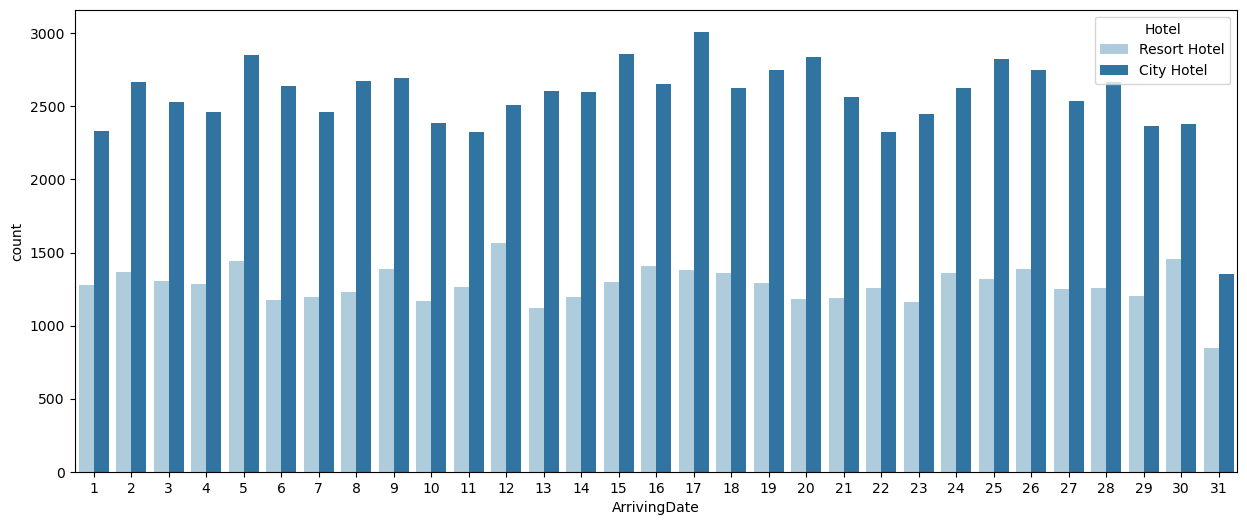

In [40]:
plt.figure(figsize=(15,6))

sns.countplot(data = hotel, x = 'ArrivingDate', hue='Hotel', palette='Paired')
plt.show()

- Month end day has very less arrivals

- Bookings are more in City hotel

### Weekend Stay

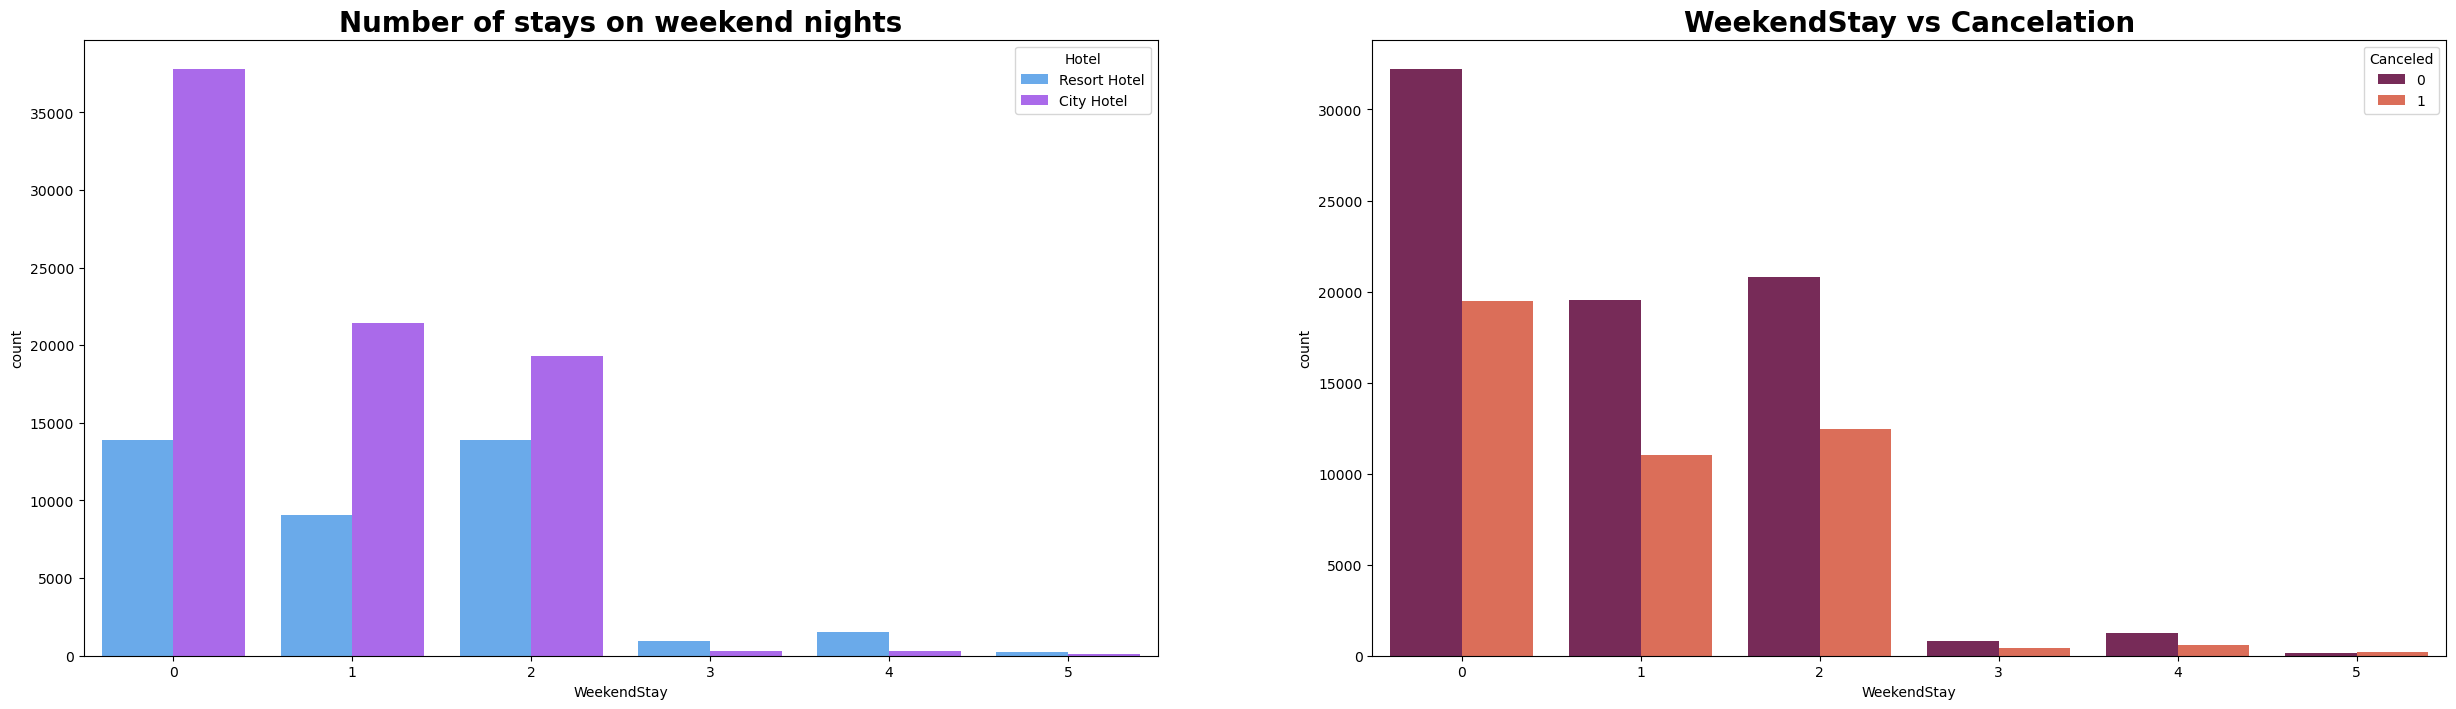

In [41]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='WeekendStay',hue='Hotel', data=hotel, palette='cool')
plt.title("Number of stays on weekend nights",fontweight="bold", size=20)
plt.subplot(1, 2, 2)
sns.countplot(data = hotel, x = 'WeekendStay', hue='Canceled', palette='rocket')
plt.title('WeekendStay vs Cancelation',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)

plt.show()

- In the first graph we can see that most of the weekend nights were booked in City Hotel

- Second plot shows most of weekend nights which were booked were not canceled

### Week Stay

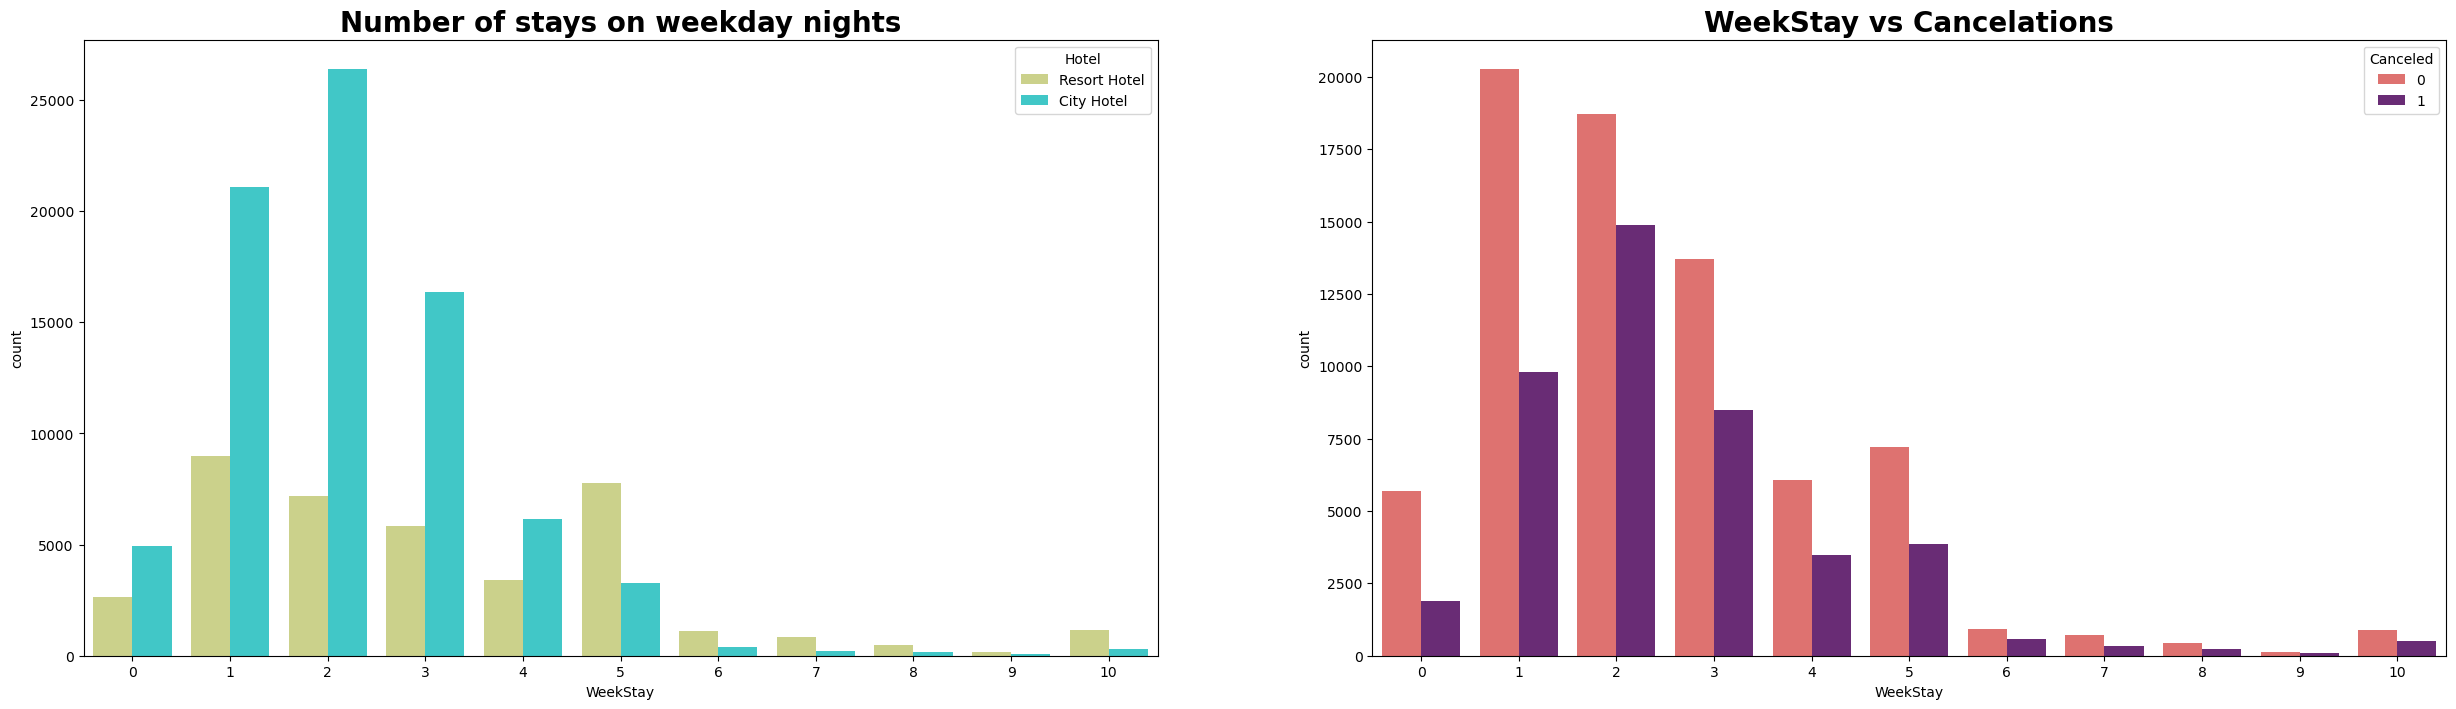

In [42]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='WeekStay',hue='Hotel', data=hotel, palette='rainbow_r')
plt.title("Number of stays on weekday nights",fontweight="bold", size=20)
plt.subplot(1, 2, 2)
sns.countplot(data = hotel, x = 'WeekStay', hue='Canceled', palette='magma_r')
plt.title('WeekStay vs Cancelations',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)


plt.show()

- Weekday night stays were more in City Hotel

- Less cancelations were observed

### Adults

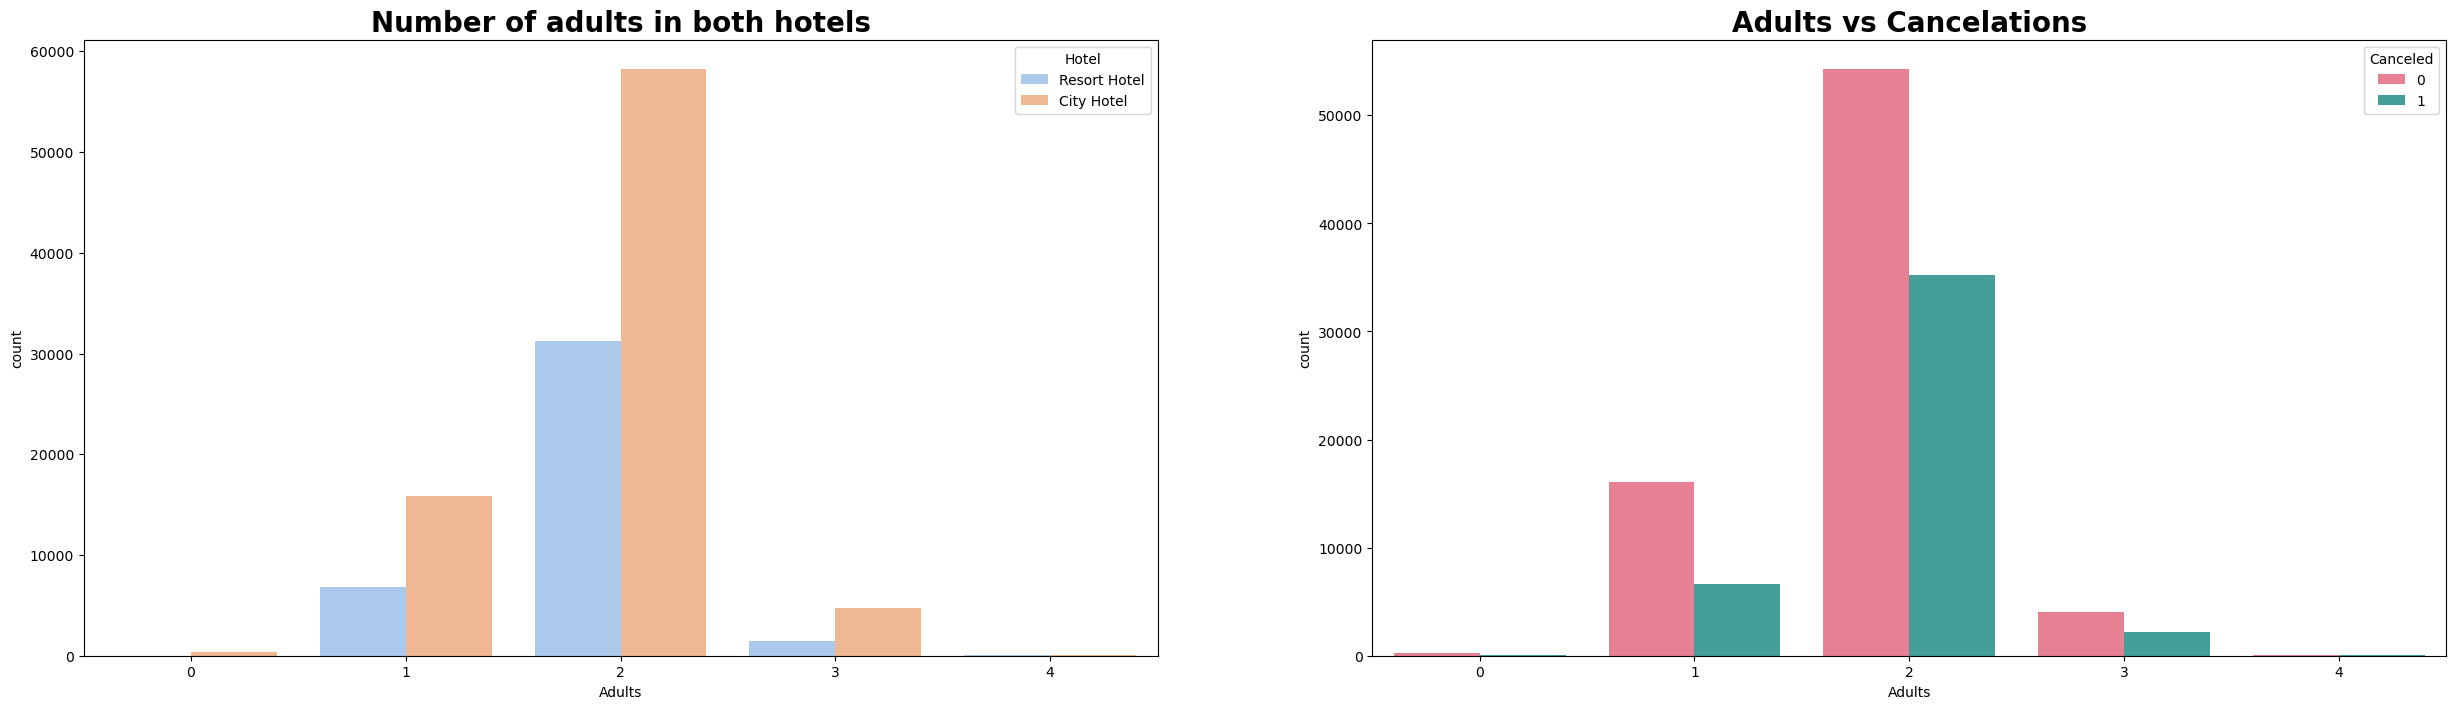

In [43]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='Adults',hue='Hotel', data=hotel, palette='pastel')
plt.title("Number of adults in both hotels",fontweight="bold", size=20)
plt.subplot(1, 2, 2)
sns.countplot(data = hotel, x = 'Adults', hue='Canceled', palette='husl')
plt.title('Adults vs Cancelations',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)


plt.show()

Adults who were 2 in number are more and preferred city hotel rather than resort hotel, infact more than half the visitors even canceled the bookings

### Children

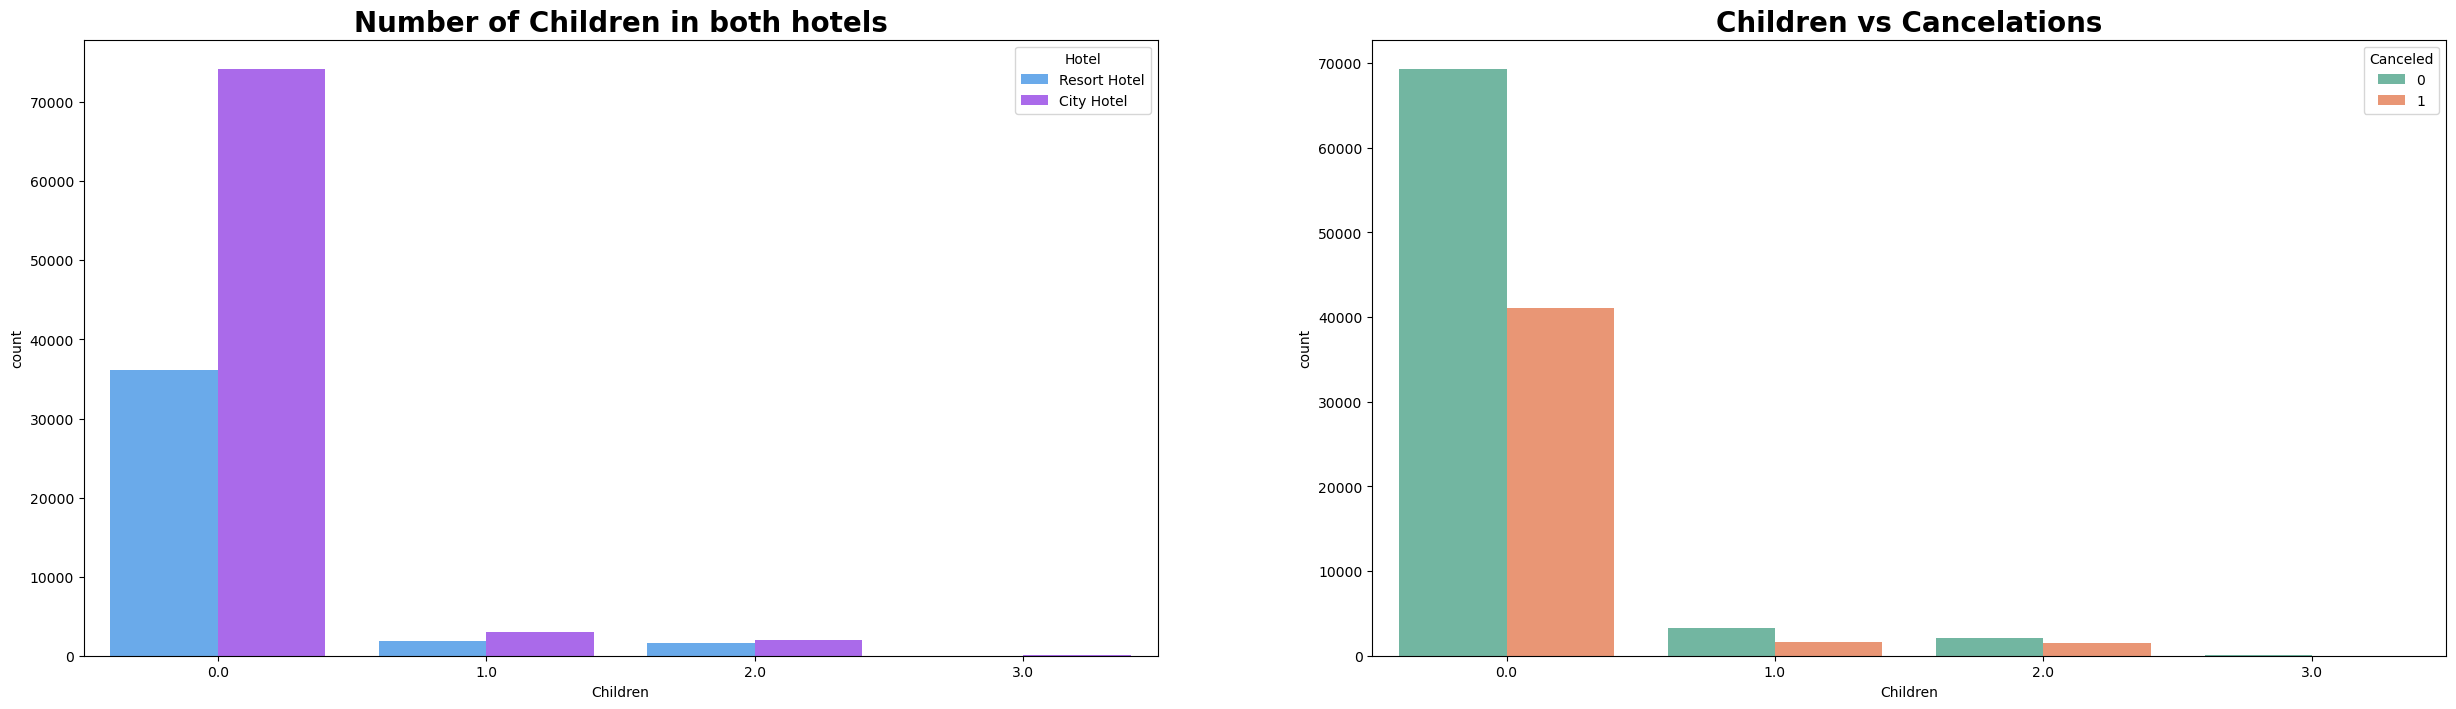

In [44]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='Children',hue='Hotel', data=hotel, palette='cool')
plt.title("Number of Children in both hotels",fontweight="bold", size=20)
plt.subplot(1, 2, 2)
sns.countplot(data = hotel, x = 'Children', hue='Canceled', palette='Set2')
plt.title('Children vs Cancelations',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)


plt.show()

### Babies

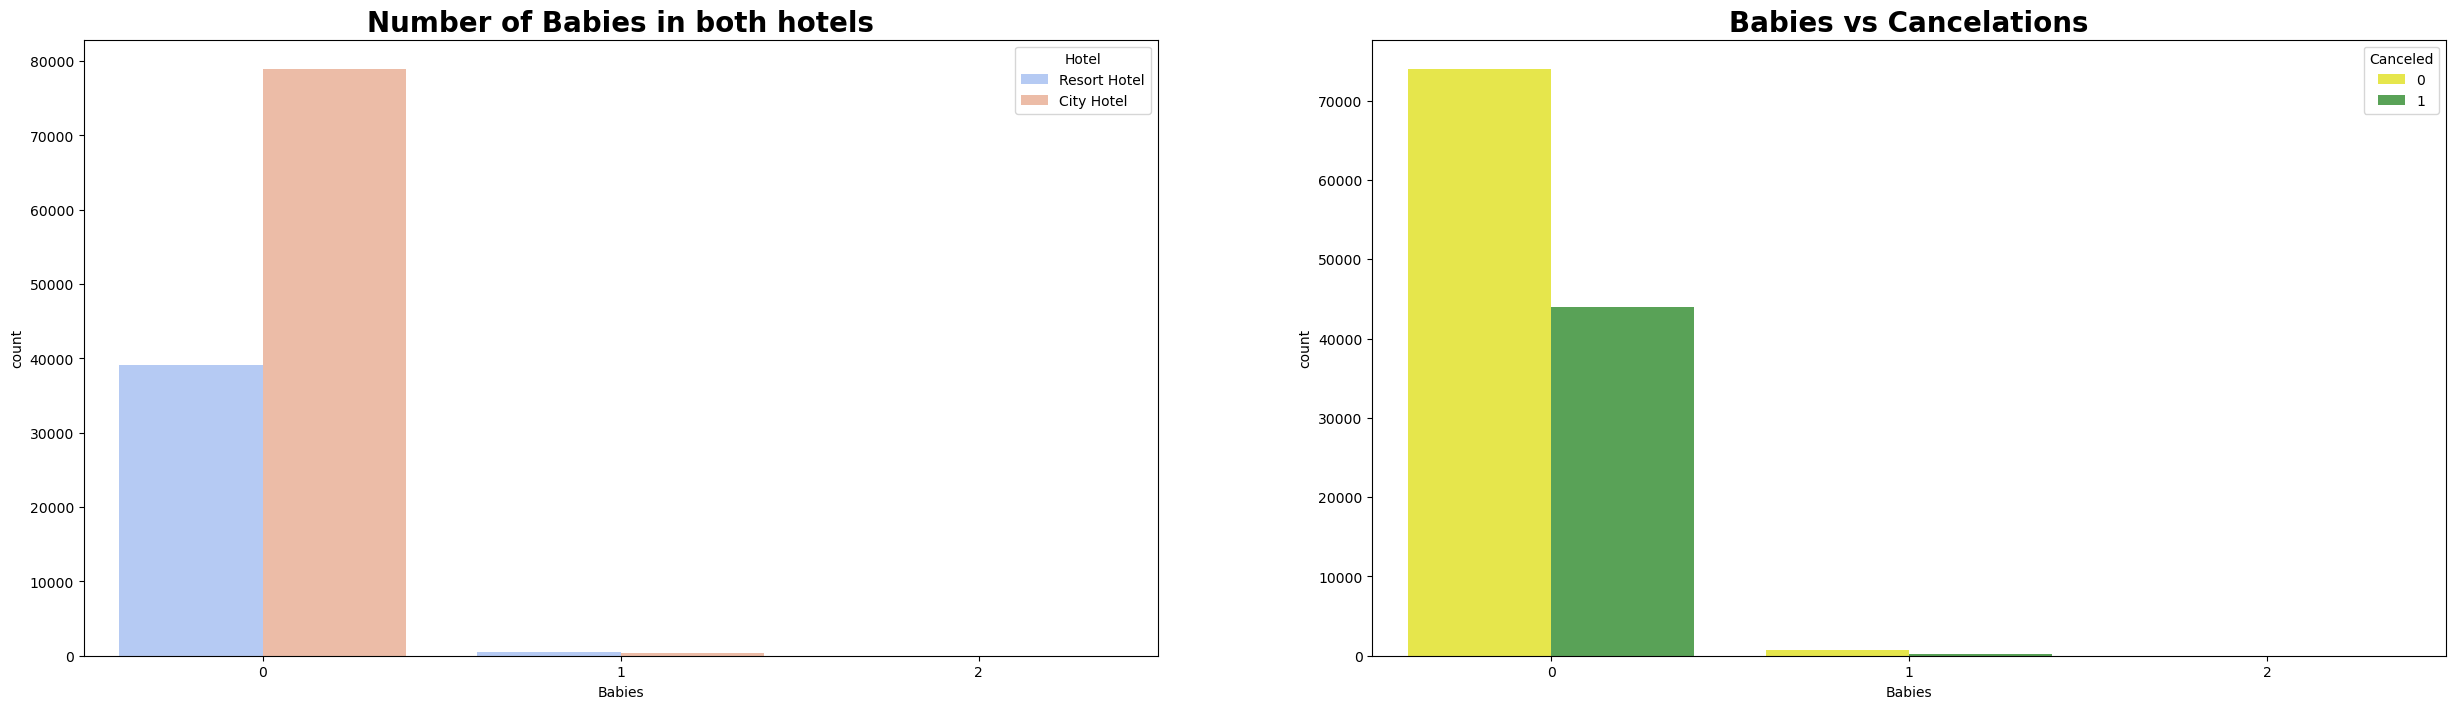

In [45]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='Babies',hue='Hotel', data=hotel, palette='coolwarm')
plt.title("Number of Babies in both hotels",fontweight="bold", size=20)

plt.subplot(1, 2, 2)
sns.countplot(data = hotel, x = 'Babies', hue='Canceled', palette='Set1_r')
plt.title('Babies vs Cancelations',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)



plt.show()

Most visitors were arrived in pair with no children/ Babies and preferred City hotel over resort hotel

Visitors who had 1 or 2 children also preferred city hotel

### Country

In [46]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
# Minmax scaler
from sklearn.preprocessing import MinMaxScaler

In [47]:
country_visitors = hotel[hotel['Canceled'] == '0'].groupby(['Country']).size().reset_index(name = 'count')


import plotly.express as px

px.choropleth(country_visitors,
                    locations = "Country",
                    color= "count" ,
                    hover_name= "Country", # column to add to hover information
                    color_continuous_scale="Viridis",
                    title="Home country of visitors")

- More visitors are from western europe, namely France, UK and Portugal being the highest.

### Market

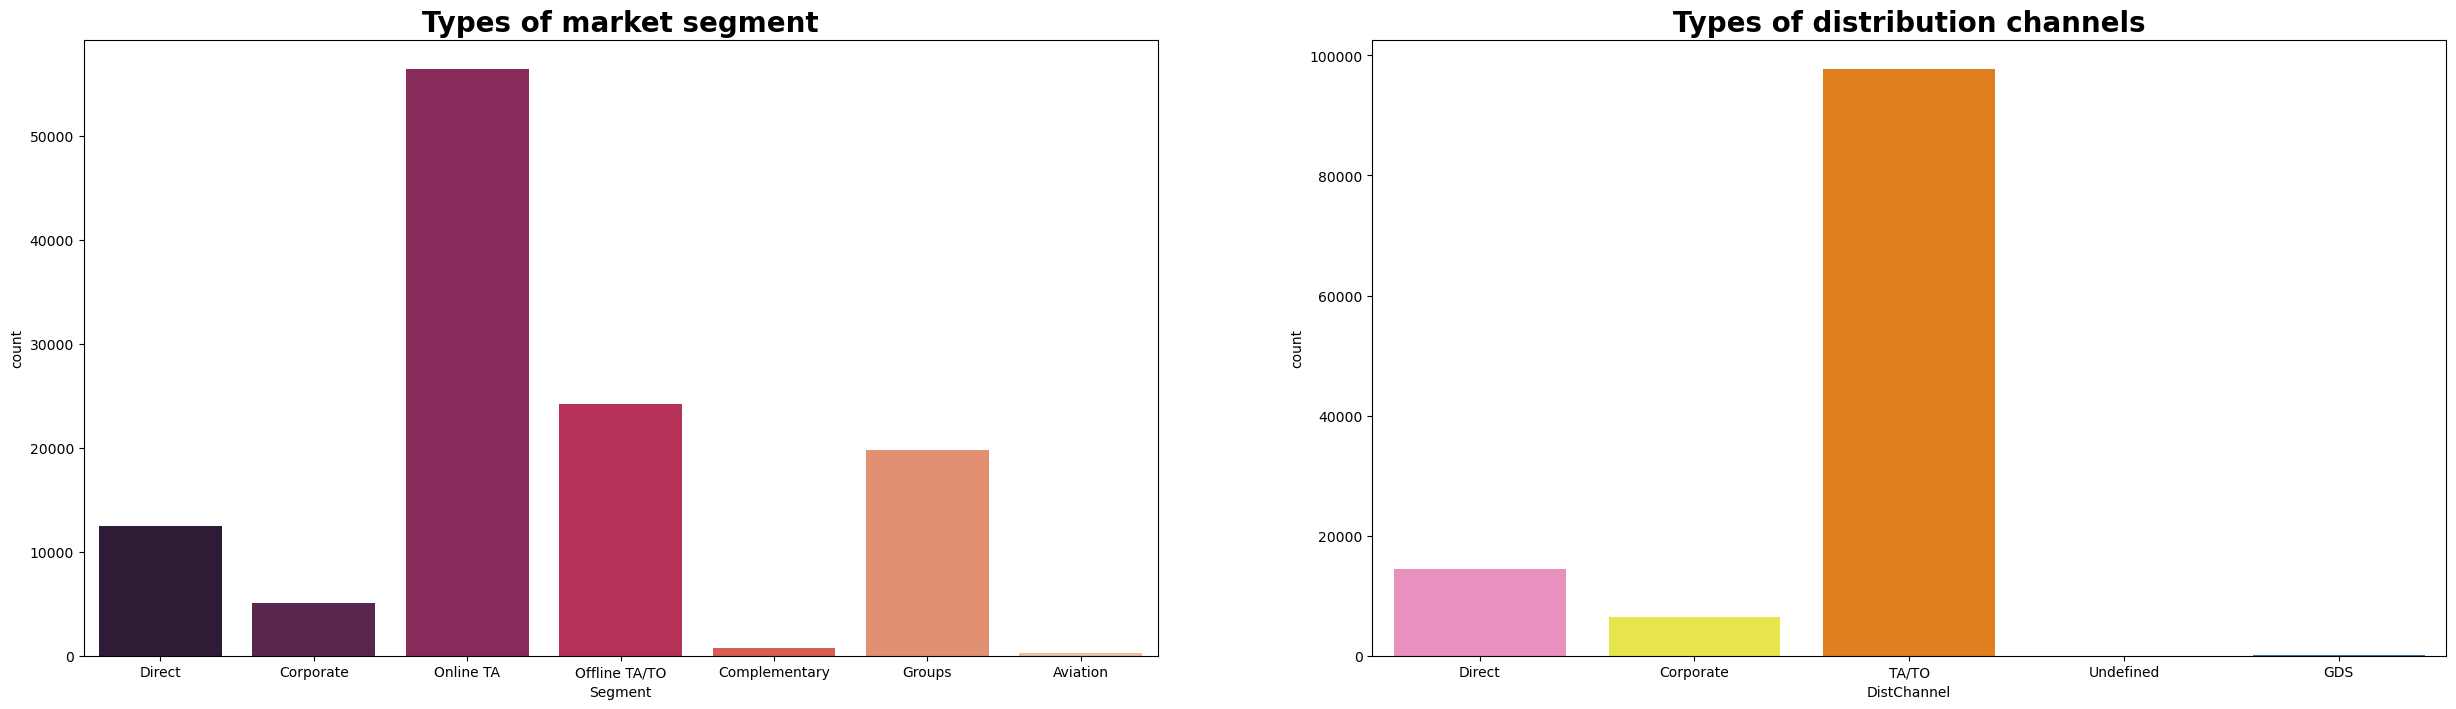

In [48]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='Segment', data=hotel, palette='rocket')
plt.title('Types of market segment',fontweight="bold", size=20)

plt.subplot(1, 2, 2)
sns.countplot(data = hotel, x = 'DistChannel',  palette='Set1_r')
plt.title('Types of distribution channels',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)



plt.show()

- Majority DIstribution channels and Market segment were Travel agencies wither offline/online. So better focus more on this

### Deposit

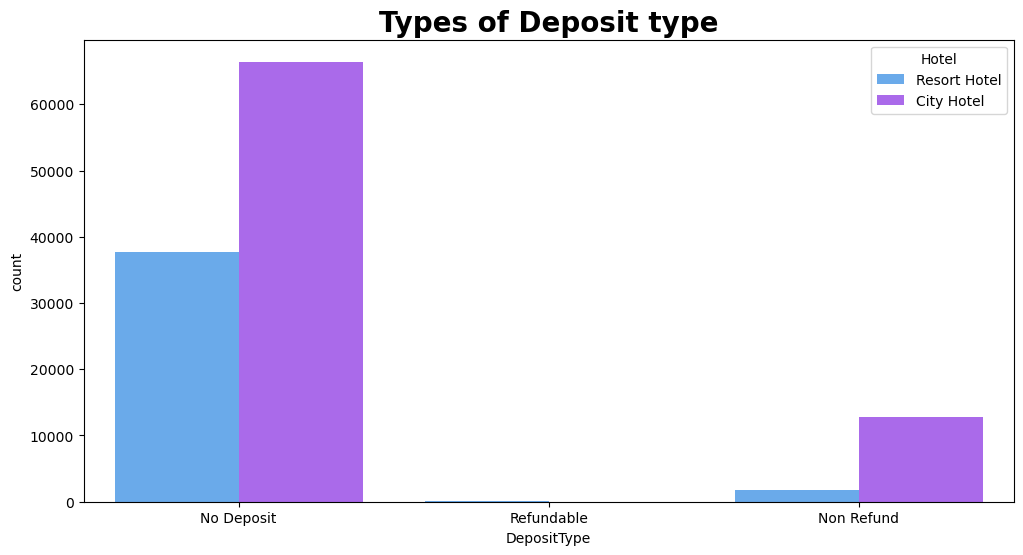

In [49]:
plt.figure(figsize=(12, 6))

sns.countplot(data = hotel, x = 'DepositType',hue='Hotel', palette='cool')
plt.title('Types of Deposit type',fontweight="bold", size=20)


plt.show()

- There was no deposit for City hotel where as Resorts had some deposits. No deposit may lead to cancel the bookings

### Repeat guest

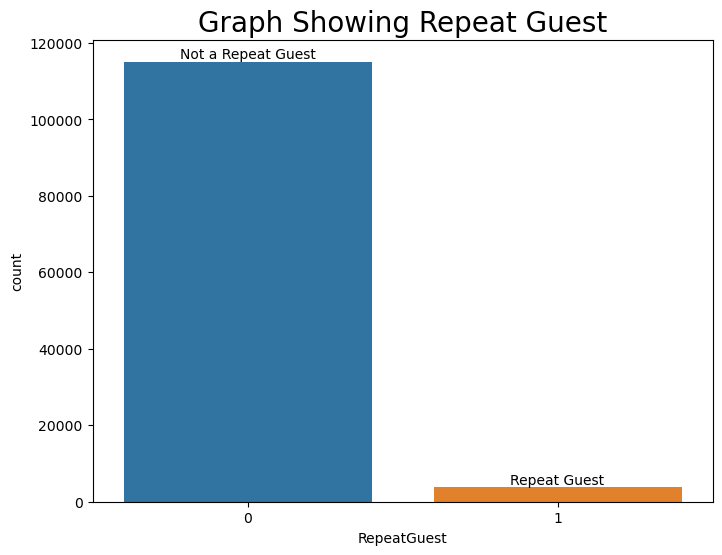

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the count plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=hotel, x='RepeatGuest')
ax.set_title('Graph Showing Repeat Guest', fontsize=20)

# Adding text annotations for the legend
plt.text(0, hotel['RepeatGuest'].value_counts()[0], 'Not a Repeat Guest', ha='center', va='bottom')
plt.text(1, hotel['RepeatGuest'].value_counts()[1], 'Repeat Guest', ha='center', va='bottom')

plt.show()


- Low number of repeated guests.

- A need to target repeated guests since they have booked before.

### Looking into prices per month per hotel

- average daily rate = [Math Processing Error]
- average daily rate per person = [Math Processing Error]
- We will need to find out average daily rate per person

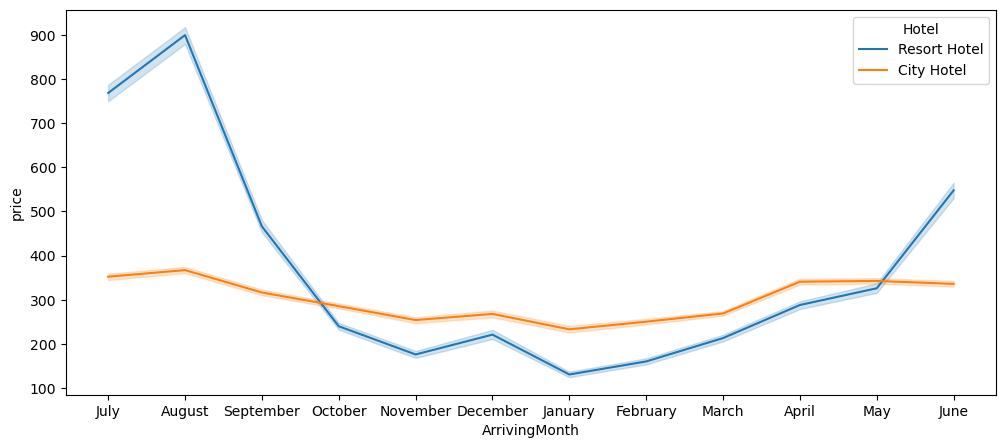

In [51]:
# Resizing plot 
plt.figure(figsize=(12,5))

# Calculating average daily rate per person
hotel['adr_pp'] = hotel['ADR'] / (hotel['Adults'] + hotel['Children']) 
actual_guests = hotel.loc[hotel["Canceled"] == '0']
actual_guests['price'] = actual_guests['ADR'] * (actual_guests['WeekendStay'] + actual_guests['WeekStay'])
sns.lineplot(data = actual_guests, x = 'ArrivingMonth', y = 'price', hue = 'Hotel')
plt.show()

- Prices of resort hotel are much higher.

- Prices of city hotel do not fluctuate that much.

### ADR: Average Daily Rate

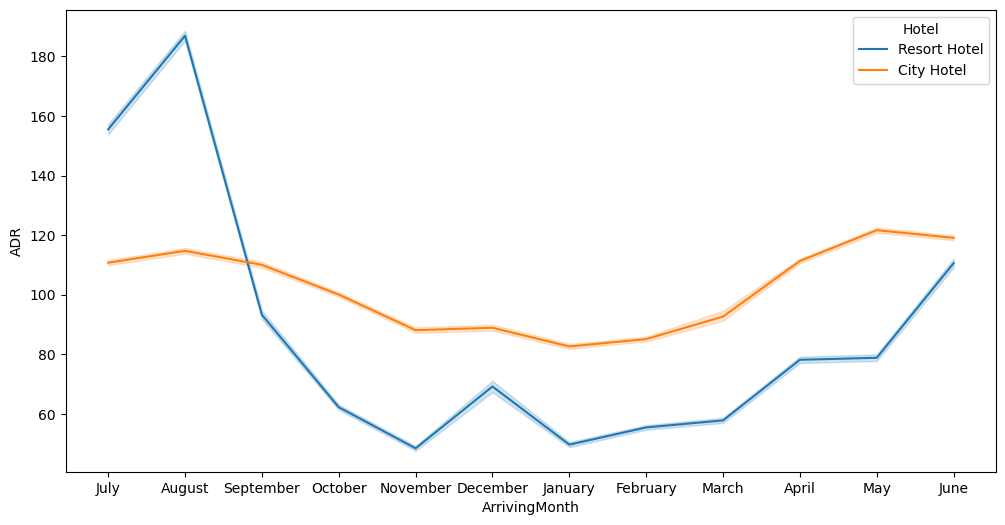

In [52]:
plt.figure(figsize=(12,6))
sns.lineplot(x='ArrivingMonth', y='ADR', hue='Hotel', data= hotel)
plt.show()

- For Resort Hotel, ADR is more expensive during July, August & September and for City Hotel, ADR is slightly more during March, April & May.

### Summary

- Majority of the hotels booked are city hotel. Definitely need to spend the most targeting fund on those hotel.
- We also realise that the high rate of cancellations can be due high no deposit policies.
- We should also target months between May to Aug. Those are peak months due to the summer period.
- Majority of the guests are from Western Europe. We should spend a significant amount of our budget on those area.
- Given that we do not have repeated guests, we should target our advertisement on guests to increase returning guests.

### Strategies to Counter High Cancellations at the Hotel

- Set Non-refundable Rates, Collect deposits, and implement more rigid cancellation policies.
- Encourage Direct bookings by offering special discounts
- Monitor where the cancellations are coming from such as Market Segment, distribution channels, etc.